In [1]:
import random

import quspin as qs
import numpy as np
from scipy.linalg import expm
from quspin.operators import hamiltonian,exp_op
from quspin.operators import quantum_operator
import sys
# np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt


In [2]:
L = 6
Basis = qs.basis.spin_basis_1d(L,pauli=0)
J = np.linspace(0,2*np.pi *5 * 10**6,60)
delta_J = 0.4* np.pi * 10**6


# Constants/Parameters
B_c = 2*np.pi *300* 10**6
B_sat = 0
e_sat_c = np.linspace(0,0.1,30)
T = 10**(-6)

In [46]:
Stability = np.zeros((30,60), dtype=complex)
state = np.zeros(Basis.Ns, dtype=complex)
index = Basis.state_to_int("001010")
state[index] = 1.0
psi_p = state
psi_i = state

In [47]:
J_xy_list = [[J[1] + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
J_z_list = [[J[1] + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
static = [["xx",J_xy_list],["yy",J_xy_list],["zz",J_z_list],["z",[[B_c,0]]]]
H= hamiltonian(static,[],basis=Basis)
U_H = exp_op(H,a= -1j*T)

Hermiticity check passed!
Symmetry checks passed!


In [5]:
operator_dict = {
 # Pauli-X on qubit 0 with coefficient 1
    "1" : [["x", [[1,i+1] for i in range(L-1)]]]  # Pauli-X on qubit 1 with coefficient 1.0
}
operator_dict1 = {"1": [["x", [[1,0]]]] }

Usat = quantum_operator(operator_dict,  basis=Basis)
Ucen = quantum_operator(operator_dict1,  basis=Basis)

U_Sx_i = exp_op(Usat,a=-1j * np.pi * (1 - e_sat_c[6]))
U_Sx_0 = exp_op(Ucen,a=-1j * np.pi * (1 - e_sat_c[6]))
U_pi = U_Sx_i.dot(U_Sx_0.get_mat())
UF = U_pi@U_H.get_mat()

Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!


In [8]:
probability_op = []
def prob_calc(initial_state,evolved_state):
    return (np.conj(initial_state.T)@evolved_state)*(np.conj(evolved_state.T)@initial_state)


In [50]:
for i in range(10000):
    probability_op.append(prob_calc(psi_i,psi_p))
    psi_p = UF@psi_p


In [56]:
print(np.real(probability_op[::2]))

[1.         0.97686932 0.92882283 ... 0.29096725 0.26407451 0.23789148]


In [59]:
for i in range(30):
    for k in range(60):
        print(i,k)
        J_xy_list = [[J[k] + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
        J_z_list = [[J[k] + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
        static = [["xx",J_xy_list],["yy",J_xy_list],["zz",J_z_list],["z",[[B_c,0]]]]
        H= hamiltonian(static,[],basis=Basis)
        U_H = exp_op(H,a= -1j*T)

        U_Sx_i = exp_op(Usat,a=-1j * np.pi * (1 - e_sat_c[i]))
        U_Sx_0 = exp_op(Ucen,a=-1j * np.pi * (1 - e_sat_c[i]))
        U_pi = U_Sx_i.dot(U_Sx_0.get_mat())
        UF = U_pi@U_H.get_mat()

        probability_op = []
        psi_p = state
        psi_i = state

        for j in range(10000):
            probability_op.append(prob_calc(psi_i,psi_p))
            psi_p = UF@psi_p

        probability_op = np.real(probability_op[::2])
        index = next((p for p, num in enumerate(probability_op) if num < 0.95), 5000)

        Stability[29-i,k] = 2* index


0 0
Hermiticity check passed!
Symmetry checks passed!
0 1
Hermiticity check passed!
Symmetry checks passed!
0 2
Hermiticity check passed!
Symmetry checks passed!
0 3
Hermiticity check passed!
Symmetry checks passed!
0 4
Hermiticity check passed!
Symmetry checks passed!
0 5
Hermiticity check passed!
Symmetry checks passed!
0 6
Hermiticity check passed!
Symmetry checks passed!
0 7
Hermiticity check passed!
Symmetry checks passed!
0 8
Hermiticity check passed!
Symmetry checks passed!
0 9
Hermiticity check passed!
Symmetry checks passed!
0 10
Hermiticity check passed!
Symmetry checks passed!
0 11
Hermiticity check passed!
Symmetry checks passed!
0 12
Hermiticity check passed!
Symmetry checks passed!
0 13
Hermiticity check passed!
Symmetry checks passed!
0 14
Hermiticity check passed!
Symmetry checks passed!
0 15
Hermiticity check passed!
Symmetry checks passed!
0 16
Hermiticity check passed!
Symmetry checks passed!
0 17
Hermiticity check passed!
Symmetry checks passed!
0 18
Hermiticity che

In [62]:
Stability1 = np.real(Stability)

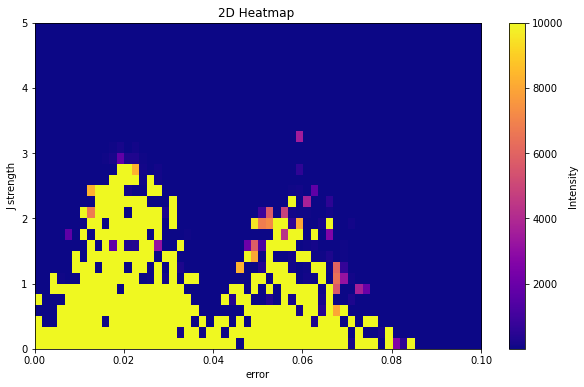

In [65]:
plt.figure(figsize=(10, 6))

# Plot using imshow
plt.imshow(Stability1, cmap='plasma', aspect='auto', extent=[0, 0.1, 0, 5])

# Set axis limits
 # Y-axis range from 3 to 9

# Add colorbar and labels
plt.colorbar(label="Intensity")
plt.xlabel("error")
plt.ylabel("J strength")
plt.title("2D Heatmap ")

plt.show()

In [63]:
Stability1

array([[2.0e+00, 2.0e+00, 2.0e+00, ..., 2.0e+00, 2.0e+00, 2.0e+00],
       [2.0e+00, 2.0e+00, 2.0e+00, ..., 2.0e+00, 2.0e+00, 2.0e+00],
       [2.0e+00, 2.0e+00, 2.0e+00, ..., 2.0e+00, 4.0e+00, 2.0e+00],
       ...,
       [1.0e+04, 1.4e+01, 2.6e+01, ..., 4.0e+00, 2.0e+00, 2.0e+00],
       [1.0e+04, 1.0e+04, 1.0e+04, ..., 2.0e+00, 2.0e+00, 6.0e+00],
       [1.0e+04, 1.0e+04, 1.0e+04, ..., 4.0e+00, 2.0e+00, 2.0e+00]])

## Changing Jz Values

In [9]:
L = 6
Basis = qs.basis.spin_basis_1d(L,pauli=0)
Jz = np.linspace(0,2*np.pi *3 * 10**6,60)
delta_J = 0.4* np.pi * 10**6


# Constants/Parameters
B_c = 2*np.pi *300* 10**6
B_sat = 0
e_sat_c = np.linspace(0,0.1,30)
T = 10**(-6)

In [10]:
Stability = np.zeros((30,60), dtype=complex)
state = np.zeros(Basis.Ns, dtype=complex)
index = Basis.state_to_int("001010")
state[index] = 1.0
psi_p = state
psi_i = state

In [11]:
for i in range(30):
    for k in range(60):
        print(i,k)
        J = (2*np.pi * 3 *10**6 - Jz[k])/2
        J_xy_list = [[J + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
        J_z_list = [[Jz[k] + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
        static = [["xx",J_xy_list],["yy",J_xy_list],["zz",J_z_list],["z",[[B_c,0]]]]
        H= hamiltonian(static,[],basis=Basis)
        U_H = exp_op(H,a= -1j*T)

        U_Sx_i = exp_op(Usat,a=-1j * np.pi * (1 - e_sat_c[i]))
        U_Sx_0 = exp_op(Ucen,a=-1j * np.pi * (1 - e_sat_c[i]))
        U_pi = U_Sx_i.dot(U_Sx_0.get_mat())
        UF = U_pi@U_H.get_mat()

        probability_op = []
        psi_p = state
        psi_i = state

        for j in range(10000):
            probability_op.append(prob_calc(psi_i,psi_p))
            psi_p = UF@psi_p

        probability_op = np.real(probability_op[::2])
        index = next((p for p, num in enumerate(probability_op) if num < 0.95), 5000)

        Stability[29-i,k] = 2* index
        Stability1 = np.real(Stability)

0 0
Hermiticity check passed!
Symmetry checks passed!
0 1
Hermiticity check passed!
Symmetry checks passed!
0 2
Hermiticity check passed!
Symmetry checks passed!
0 3
Hermiticity check passed!
Symmetry checks passed!
0 4
Hermiticity check passed!
Symmetry checks passed!
0 5
Hermiticity check passed!
Symmetry checks passed!
0 6
Hermiticity check passed!
Symmetry checks passed!
0 7
Hermiticity check passed!
Symmetry checks passed!
0 8
Hermiticity check passed!
Symmetry checks passed!
0 9
Hermiticity check passed!
Symmetry checks passed!
0 10
Hermiticity check passed!
Symmetry checks passed!
0 11
Hermiticity check passed!
Symmetry checks passed!
0 12
Hermiticity check passed!
Symmetry checks passed!
0 13
Hermiticity check passed!
Symmetry checks passed!
0 14
Hermiticity check passed!
Symmetry checks passed!
0 15
Hermiticity check passed!
Symmetry checks passed!
0 16
Hermiticity check passed!
Symmetry checks passed!
0 17
Hermiticity check passed!
Symmetry checks passed!
0 18
Hermiticity che

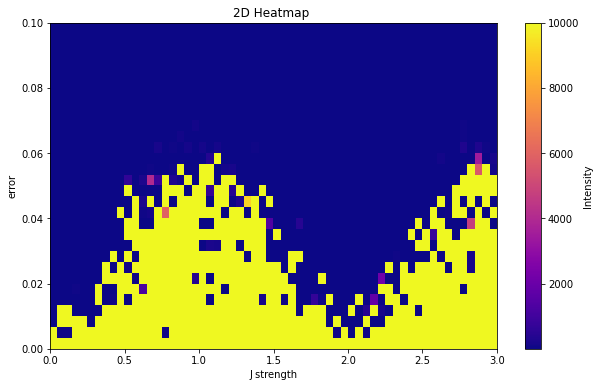

In [13]:
plt.figure(figsize=(10, 6))

# Plot using imshow
plt.imshow(Stability1, cmap='plasma', aspect='auto', extent=[0, 3, 0, 0.1])

# Set axis limits
 # Y-axis range from 3 to 9

# Add colorbar and labels
plt.colorbar(label="Intensity")
plt.xlabel("J strength")
plt.ylabel("error")
plt.title("2D Heatmap ")

plt.show()

## H2I Phase

In [8]:
L = 6
Basis = qs.basis.spin_basis_1d(L,pauli=0)
J = np.linspace(0,2*np.pi *5 * 10**6,60)
delta_J = 0.4* np.pi * 10**6


# Constants/Parameters
B_c = 0 #2*np.pi *300* 10**6
B_sat = 0
e_sat_c = np.linspace(0,0.1,30)
e_z = 0.01
T = 10**(-6)

In [9]:
Stability = np.zeros((30,60), dtype=complex)
state = np.zeros(Basis.Ns, dtype=complex)
index = Basis.state_to_int("001010")
state[index] = 1.0
psi_p = state
psi_i = state

In [10]:
operator_dict = {
 # Pauli-X on qubit 0 with coefficient 1
    "1" : [["x", [[1,i+1] for i in range(L-1)]]]  # Pauli-X on qubit 1 with coefficient 1.0
}
operator_dict1 = {"1": [["x", [[1,0]]]] }

Usat = quantum_operator(operator_dict,  basis=Basis)
Ucen = quantum_operator(operator_dict1,  basis=Basis)

U_Sx_i = exp_op(Usat,a=-1j * np.pi * (1 - e_sat_c[6]))
U_Sx_0 = exp_op(Ucen,a=-1j * np.pi * (1 - e_sat_c[6]))
U_pi = U_Sx_i.dot(U_Sx_0.get_mat())


Hermiticity check passed!
Symmetry checks passed!
Hermiticity check passed!
Symmetry checks passed!


In [11]:
probability_op = []
def prob_calc(initial_state,evolved_state):
    return (np.conj(initial_state.T)@evolved_state)*(np.conj(evolved_state.T)@initial_state)


In [12]:
#H2I pulses
m = 40
H2I_op = {
    #Pauli Z on qubit 0 with coefficient 1
    "1" : [["z", [[1,0]]]]  #Pauli Z on qubit 1 with coefficient 1.0
}
H2I0 = quantum_operator(H2I_op,  basis=Basis)
H2I =  exp_op(H2I0,a=1j *np.pi * (1 - e_z))
UH2I = H2I.get_mat()

Hermiticity check passed!
Symmetry checks passed!


In [7]:
def floquet_operator(state,pi,H,pulse,m):
    for i in range(m):
        state = pulse@H@state
    state = pi@state
    return state

In [15]:
for i in range(30):
    for k in range(60):
        print(i,k)
        J_xy_list = [[J[k] + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
        J_z_list = [[J[k] + np.random.normal(0, delta_J), 0, i] for i in range(1, L)]
        static = [["xx",J_xy_list],["yy",J_xy_list],["zz",J_z_list],["z",[[B_c,0]]]]
        H= hamiltonian(static,[],basis=Basis)
        U_H = exp_op(H,a= (-1j*T/40))
        U_H = U_H.get_mat()

        U_Sx_i = exp_op(Usat,a=-1j * np.pi * (1 - e_sat_c[i]))
        U_Sx_0 = exp_op(Ucen,a=-1j * np.pi * (1 - e_sat_c[i]))
        U_pi = U_Sx_i.dot(U_Sx_0.get_mat())

        probability_op = []
        psi_p = state
        psi_i = state

        for j in range(10000):
            probability_op.append(prob_calc(psi_i,psi_p))
            psi_p = floquet_operator(psi_p,U_pi,U_H,UF,40)

        probability_op = np.real(probability_op[::2])
        index = next((p for p, num in enumerate(probability_op) if num < 0.95), 5000)

        Stability[29-i,k] = 2* index

Stability1 = np.real(Stability)
plt.figure(figsize=(10, 6))

# Plot using imshow
plt.imshow(Stability1, cmap='plasma', aspect='auto', extent=[0, 5, 0, 0.1])

# Set axis limits
 # Y-axis range from 3 to 9

# Add colorbar and labels
plt.colorbar(label="Intensity")
plt.ylabel("error")
plt.xlabel("J strength")
plt.title("2D Heatmap ")

plt.show()

0 0
Hermiticity check passed!
Symmetry checks passed!
0 1
Hermiticity check passed!
Symmetry checks passed!
0 2
Hermiticity check passed!
Symmetry checks passed!
0 3
Hermiticity check passed!
Symmetry checks passed!
0 4
Hermiticity check passed!
Symmetry checks passed!
0 5
Hermiticity check passed!
Symmetry checks passed!
0 6
Hermiticity check passed!
Symmetry checks passed!
0 7
Hermiticity check passed!
Symmetry checks passed!
0 8
Hermiticity check passed!
Symmetry checks passed!
0 9
Hermiticity check passed!
Symmetry checks passed!
0 10
Hermiticity check passed!
Symmetry checks passed!
0 11
Hermiticity check passed!
Symmetry checks passed!
0 12
Hermiticity check passed!
Symmetry checks passed!
0 13
Hermiticity check passed!
Symmetry checks passed!
0 14
Hermiticity check passed!
Symmetry checks passed!
0 15
Hermiticity check passed!
Symmetry checks passed!
0 16
Hermiticity check passed!
Symmetry checks passed!
0 17
Hermiticity check passed!
Symmetry checks passed!
0 18
Hermiticity che

KeyboardInterrupt: 